In [3]:
import networkx as nx # Import the NetworkX library for working with graphs 
import numpy as np # Import the numpy library for numerical calculations 
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import scipy.stats # Import the scipy.stats module for statistical functions

In [4]:
graph = nx.read_graphml("Network.graphml")

In [5]:
degree = dict(graph.degree())

In [6]:
degree_values = list(degree.values())

In [29]:
bins = 10 # Number of bins for the histogram 
hist, bin_edges = np.histogram(degree_values, bins=bins) # Calculate the frequencies and the bin edges


In [30]:
average_degree = sum(degree_values) / len(degree_values) # Calculate the average degree 
max_degree = max(degree_values) # Calculate the maximum degree 
min_degree = min(degree_values) # Calculate the minimum degree 
std_degree = np.std(degree_values) # Calculate the standard deviation of the degree 
skew_degree = scipy.stats.skew(degree_values) # Use the scipy.stats.skew function
kurt_degree = scipy.stats.kurtosis(degree_values) # Use the scipy.stats.kurtosis function

In [31]:
description = "The degree distribution of the graph has " + str(bins) + " bins, ranging from " + str(min_degree) + " to " + str(max_degree) + ".\n" # Write the first sentence of the description 
description += "The average degree is " + str(average_degree) + ", with a standard deviation of " + str(std_degree) + ".\n" # Write the second sentence of the description 
if skew_degree > 0: # Check if the distribution is positively skewed
    description += "The distribution is positively skewed, meaning that most nodes have low degrees and a few nodes have high degrees.\n" # Write the third sentence of the description 
elif skew_degree < 0: # Check if the distribution is negatively skewed 
    description += "The distribution is negatively skewed, meaning that most nodes have high degrees and a few nodes have low degrees.\n" # Write the third sentence of the description 
else: # Check if the distribution is symmetric 
    description += "The distribution is symmetric, meaning that nodes have similar degrees around the average.\n" # Write the third sentence of the description

if kurt_degree > 0: # Check if the distribution is leptokurtic 
    description += "The distribution is leptokurtic, meaning that it has a sharp peak and heavy tails.\n" # Write the fourth sentence of the description 
elif kurt_degree < 0: # Check if the distribution is platykurtic 
    description += "The distribution is platykurtic, meaning that it has a flat peak and light tails.\n" # Write the fourth sentence of the description 
else: # Check if the distribution is mesokurtic 
    description += "The distribution is mesokurtic, meaning that it has a normal peak and tails.\n" # Write the fourth sentence of the description

In [32]:
with open("Degree_Distribution_test_results.txt", "w") as f: 
    f.write("Histogram data:\n") # Write header for histogram data section 
    f.write("Bin edges: " + str(bin_edges) + "\n") # Write bin edges to file 
    f.write("Frequencies: " + str(hist) + "\n") # Write frequencies to file 
    f.write("\nDescription:\n") # Write header for description section 
    f.write(description) # Write description to file

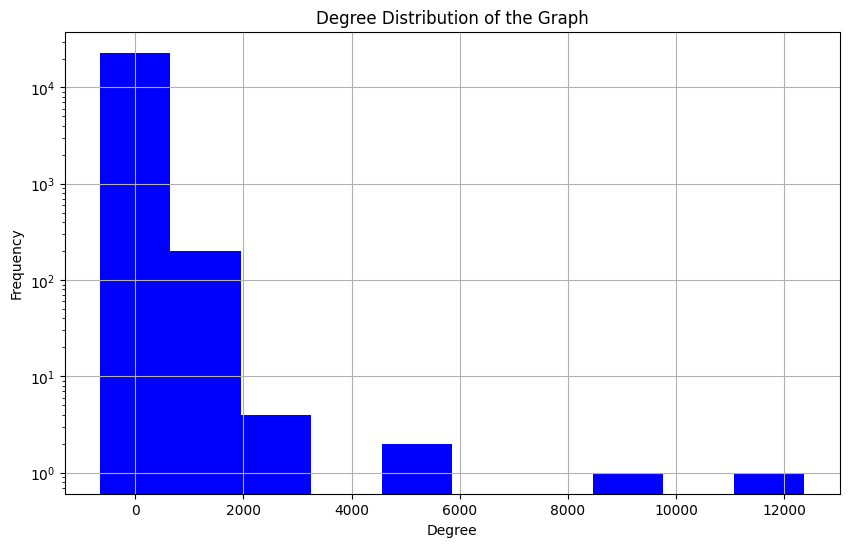

In [33]:
# Add these lines after importing matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Create a new figure object with a larger size
plt.bar(bin_edges[:-1], hist, width=bin_edges[1]-bin_edges[0], color="blue") # Plot a bar chart of the frequencies and bin edges with a red color
plt.xlabel("Degree") # Add a label for the x-axis that indicates what variable we are plotting
plt.ylabel("Frequency") # Add a label for the y-axis that indicates what measure we are using
plt.title("Degree Distribution of the Graph") # Add a title for the plot that summarizes what we are showing
plt.yscale("log") # Use a logarithmic scale for the y-axis to show the variation better
plt.grid(True) # Add some grid lines to the plot to help identify the values
plt.savefig("Degree_Disjhkjfdtribution.png") # Save the plot as an image file with a meaningful name
plt.show() # Show the plot on the screen so we can see it
